Atividade Final

<h1>Relatório Final Bootcamp Data Science</h1>
<h2><b>Aluno:</b> Jorge Leandro Piva</h2>

<p> Objetivo: Conduzir uma análise exploratória com o dataset de dados de consumo de energia elétrica.</b>

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import plotly.express as px

Remover Notação científica do Pandas, muito útil por causa de número muito altos no dataset.

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

Carregamento dos dados de estados no dataframe de estados

In [3]:
estados_df = pd.read_csv('dados/estado_regiao.csv', encoding='latin1', sep=';')

Carregamento dos dados de consumo de energia para o dataset de energia_df

In [4]:
energia_df = pd.read_csv('dados/consumo_energia_eletrica.csv')

Concatenação dos dados dos dois dataframes.

In [5]:
df_completo = pd.merge(
    energia_df,
    estados_df,
    left_on='sigla_uf',
    right_on='sigla',
    how='inner'  
)


Verificação das Variáveis categóricas.

In [6]:
df_completo.describe(include=['object'])

,sigla_uf,tipo_consumo,sigla,estado,regiao,pais
count,39897,39897,39897,39897,39897,39897
unique,27,6,27,27,5,1
top,TO,Comercial,TO,Tocantins,Nordeste,Brasil
freq,1478,6804,1478,1478,13301,39897


Remoção da coluna sigla porque se tornou um valor repetido e a coluna país por se tratar de apenas uma ocorrência não tendo relevância para a análise.

In [7]:
df_completo.drop(columns=['sigla', 'pais'], inplace=True)


Verificação das primeiras linhas do DataFrame

In [8]:
df_completo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao
0,2004,1,TO,Total,NaN,65876,27,Tocantins,Norte
1,2004,2,TO,Total,NaN,63306,27,Tocantins,Norte
2,2004,3,TO,Total,NaN,67551,27,Tocantins,Norte
3,2004,4,TO,Total,NaN,71774,27,Tocantins,Norte
4,2004,5,TO,Total,NaN,74458,27,Tocantins,Norte


Identificados valores nulos e NaN na primeira amostra verificação geral na sequência.

In [9]:
df_completo.isnull().sum()


ano                        0
mes                        0
sigla_uf                   0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
id_estado                  0
estado                     0
regiao                     0
dtype: int64

Verificação das informações do dataframe.

In [10]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
 6   id_estado            39897 non-null  int64  
 7   estado               39897 non-null  object 
 8   regiao               39897 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ MB


Verificação de linhas duplicadas

In [11]:
# Verifica se existem linhas completamente duplicadas no df_completo
duplicadas = df_completo.duplicated()
num_duplicadas = duplicadas.sum()
print(f"Número de linhas completamente duplicadas: {num_duplicadas}")

# Se quiser ver as linhas duplicadas:
if num_duplicadas > 0:
    display(df_completo[duplicadas])

Número de linhas completamente duplicadas: 1017


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao
1440,2023,11,TO,Outros,54094.00,53200,27,Tocantins,Norte
1441,2023,12,TO,Outros,53923.00,51090,27,Tocantins,Norte
1442,2023,1,TO,Comercial,34772.00,34724,27,Tocantins,Norte
1443,2023,2,TO,Comercial,34733.00,35077,27,Tocantins,Norte
1444,2023,3,TO,Comercial,34853.00,39906,27,Tocantins,Norte
...,...,...,...,...,...,...,...,...,...
39892,2023,8,CE,Residencial,3490593.00,443028,6,Ceará,Nordeste
39893,2023,9,CE,Residencial,3498950.00,462323,6,Ceará,Nordeste
39894,2023,10,CE,Residencial,3587045.00,453080,6,Ceará,Nordeste
39895,2023,11,CE,Residencial,3628433.00,513269,6,Ceará,Nordeste


Remoção das duplicidades

In [12]:
df_completo = df_completo.drop_duplicates()

Fazendo nova verificação dos dados nulos.

In [13]:
df_completo.isnull().sum()

ano                        0
mes                        0
sigla_uf                   0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
id_estado                  0
estado                     0
regiao                     0
dtype: int64

Não Houve mudança os dados duplicados não tinham valores ausentes, fazendo uma análise mais completa dos valores missing.

In [14]:
# Filtra as linhas com numero_consumidores ausente e mostra os estados e anos correspondentes
missing_info = energia_df[energia_df['numero_consumidores'].isnull()][['ano', 'sigla_uf']]
missing_summary = missing_info.groupby(['sigla_uf', 'ano']).size().reset_index(name='quantidade')
missing_summary

,sigla_uf,ano,quantidade
0,AC,2004,24
1,AC,2005,24
2,AC,2006,24
3,AC,2007,24
4,AC,2008,24
...,...,...,...
535,TO,2019,24
536,TO,2020,24
537,TO,2021,24
538,TO,2022,24


Aparentemente todos os valores Missing tem a mesma quantidade de linhas por estado mes e ano, vamos ver em um Heatmap se isso é verdade.

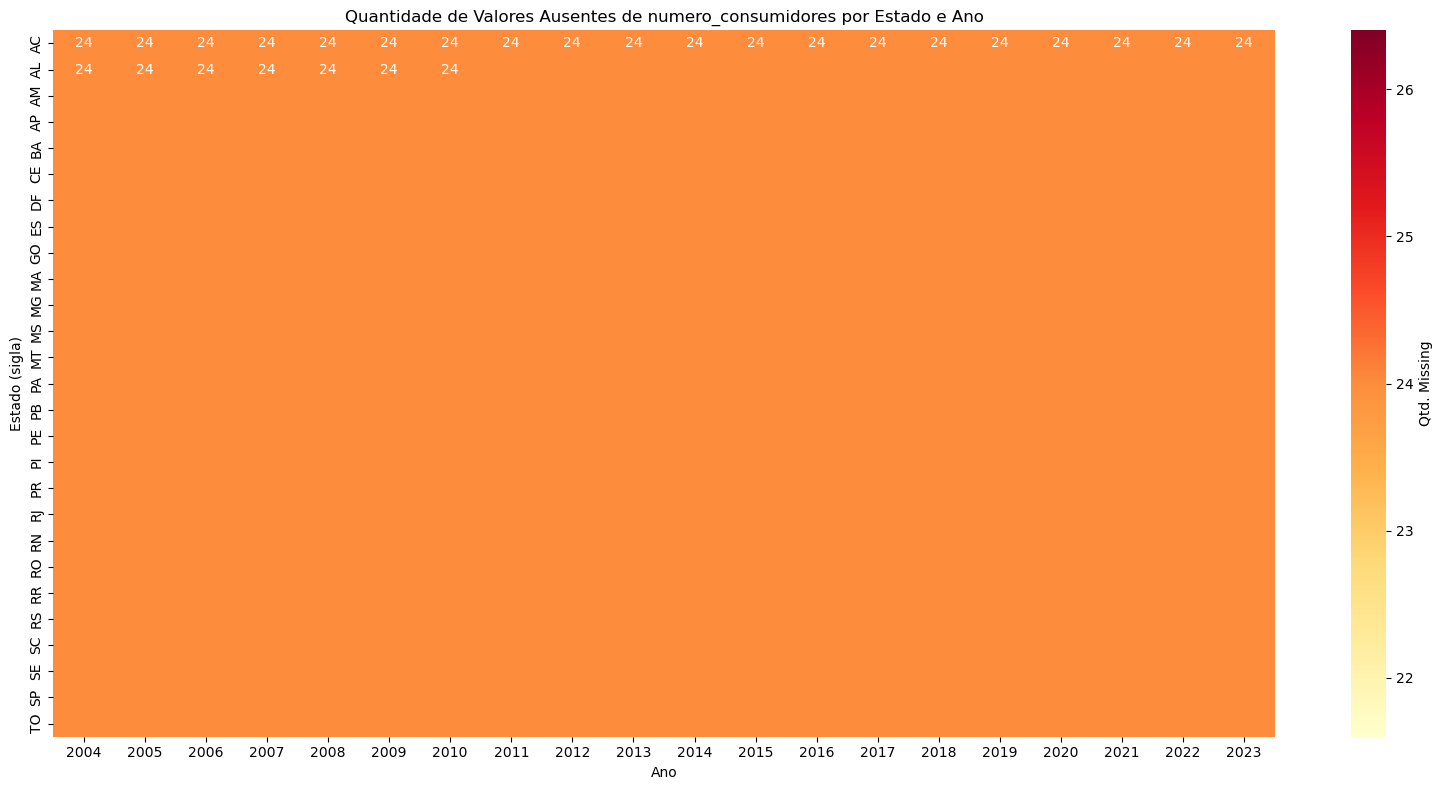

In [15]:
# Cria um heatmap dos valores ausentes por ano e estado
pivot_missing = missing_summary.pivot(index='sigla_uf', columns='ano', values='quantidade').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_missing, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Qtd. Missing'})
plt.title('Quantidade de Valores Ausentes de numero_consumidores por Estado e Ano')
plt.xlabel('Ano')
plt.ylabel('Estado (sigla)')
plt.tight_layout()
plt.show()

Se confirmou vamos olhar por tipo de Consumo e Ano.

ano,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipo_consumo,,,,,,,,,,,,,,,,,,,,
Cativo,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
Total,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324


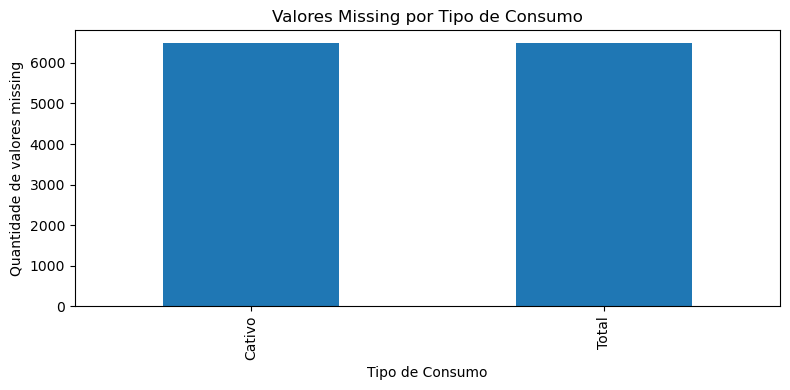

In [16]:
# Agrupa os valores missing por tipo de consumo, estado e ano
missing_by_tipo = energia_df[energia_df['numero_consumidores'].isnull()] \
    .groupby(['sigla_uf', 'ano', 'tipo_consumo']).size().reset_index(name='quantidade')

# Visualiza a distribuição dos missing por tipo de consumo
pivot_tipo = missing_by_tipo.pivot_table(index='tipo_consumo', columns='ano', values='quantidade', aggfunc='sum', fill_value=0)
display(pivot_tipo)

# Gráfico de barras para visualizar os tipos de consumo com mais valores ausentes
pivot_tipo.sum(axis=1).sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title='Valores Missing por Tipo de Consumo')
plt.ylabel('Quantidade de valores missing')
plt.xlabel('Tipo de Consumo')
plt.tight_layout()
plt.show()

Vejamos se estes tipos de consumo Cativo e Total são Representativos.

In [17]:
import plotly.express as px

# Agrupa o consumo total por tipo de consumo no dataset completo
consumo_por_tipo = df_completo.groupby('tipo_consumo')['consumo'].sum().reset_index()

# Converte para milhões para facilitar a leitura
consumo_por_tipo['consumo_milhao'] = consumo_por_tipo['consumo'] / 1_000_000

fig = px.bar(
    consumo_por_tipo.sort_values('consumo_milhao', ascending=False),
    x='tipo_consumo', y='consumo_milhao',
    title='Consumo Total de Energia por Tipo de Consumo (2004-2023)',
    labels={'consumo_milhao': 'Consumo Total (milhões kWh)', 'tipo_consumo': 'Tipo de Consumo'}
)
fig.show()

Total é o primeiro maior consumo e Cativo é o segundo, fiquei na dúvida se total seria a soma dos outros tipos de consumo, porém, não bate se somarmos Cativo com Industrial já superaríamos o total 

Após isso vamos ver se Cativo tem dados missing e algumas situações de população e em outras não.

In [18]:
import plotly.graph_objects as go

# Contagem de linhas do mercado cativo com e sem missing em numero_consumidores
cativo = energia_df[energia_df['tipo_consumo'] == 'Cativo']
count_missing = cativo['numero_consumidores'].isnull().sum()
count_not_missing = cativo['numero_consumidores'].notnull().sum()

fig_count = go.Figure(data=[
    go.Bar(name='Missing', x=['Missing'], y=[count_missing]),
    go.Bar(name='Sem Missing', x=['Sem Missing'], y=[count_not_missing])
])
fig_count.update_layout(
    title='Contagem de Linhas do Mercado Cativo (Missing vs Sem Missing)',
    yaxis_title='Quantidade de Linhas',
    xaxis_title='Situação'
)
fig_count.show()

# Soma do consumo do mercado cativo com e sem missing em numero_consumidores
sum_missing = cativo[cativo['numero_consumidores'].isnull()]['consumo'].sum()
sum_not_missing = cativo[cativo['numero_consumidores'].notnull()]['consumo'].sum()

fig_sum = go.Figure(data=[
    go.Bar(name='Missing', x=['Missing'], y=[sum_missing]),
    go.Bar(name='Sem Missing', x=['Sem Missing'], y=[sum_not_missing])
])
fig_sum.update_layout(
    title='Soma do Consumo do Mercado Cativo (Missing vs Sem Missing)',
    yaxis_title='Consumo Total (kWh)',
    xaxis_title='Situação'
)
fig_sum.show()


Percebemos que todos os dados do consumo cativo não tem população atrelada
Inicialmente iria preencher esse dado com regressão linear, porém, como não tenho dentro deste tipo de consumo nenhum registro decidi remover todos os valores missing.

In [19]:
df_completo = df_completo.dropna()

In [20]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25920 entries, 24 to 39858
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   sigla_uf             25920 non-null  object 
 3   tipo_consumo         25920 non-null  object 
 4   numero_consumidores  25920 non-null  float64
 5   consumo              25920 non-null  int64  
 6   id_estado            25920 non-null  int64  
 7   estado               25920 non-null  object 
 8   regiao               25920 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.0+ MB


In [21]:
df_completo.describe()

,ano,mes,numero_consumidores,consumo,id_estado
count,25920.00,25920.00,25920.00,25920.00,25920.00
mean,2013.50,6.50,682303.38,339170.90,14.00
std,5.77,3.45,1839311.69,603642.75,7.79
min,2004.00,1.00,52.00,354.00,1.00
25%,2008.75,3.75,18956.50,61545.50,7.00
50%,2013.50,6.50,108174.50,136754.50,14.00
75%,2018.25,9.25,442412.00,361651.75,21.00
max,2023.00,12.00,19201264.00,4849895.00,27.00


In [22]:
df_completo.describe(include=['object'])

,sigla_uf,tipo_consumo,estado,regiao
count,25920,25920,25920,25920
unique,27,4,27,5
top,TO,Outros,Tocantins,Nordeste
freq,960,6480,960,8640


Ajustaremos alguns dados para a escala e começaremos as análises

In [23]:
# Ajuste dos dados para facilitar leitura dos gráficos
df_plot = df_completo.copy()
df_plot['numero_consumidores_mil'] = df_plot['numero_consumidores'] / 1_000
df_plot['consumo_milhao'] = df_plot['consumo'] / 1_000_000

In [24]:
# 1. Consumo total por ano
fig1 = px.bar(
    df_plot.groupby('ano')['consumo_milhao'].sum().reset_index(),
    x='ano', y='consumo_milhao',
    title='Consumo Total de Energia por Ano (em milhões de kWh)',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'ano': 'Ano'}
)
fig1.show()

Insight: O consumo de energia elétrica no Brasil apresenta tendência de crescimento ao longo dos anos.

In [25]:
# 2. Número de consumidores por ano
fig2 = px.line(
    df_plot.groupby('ano')['numero_consumidores_mil'].sum().reset_index(),
    x='ano', y='numero_consumidores_mil',
    title='Número Total de Consumidores por Ano (em milhares)',
    labels={'numero_consumidores_mil': 'Consumidores (milhares)', 'ano': 'Ano'}
)
fig2.show()

Insight: O número de consumidores cresce de forma consistente, indicando expansão do acesso à energia.

In [26]:
# 3. Consumo por região ao longo dos anos
fig3 = px.line(
    df_plot.groupby(['ano', 'regiao'])['consumo_milhao'].sum().reset_index(),
    x='ano', y='consumo_milhao', color='regiao',
    title='Consumo de Energia por Região ao Longo dos Anos',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'ano': 'Ano', 'regiao': 'Região'}
)
fig3.show()

Insight: Sudeste lidera o consumo, mas outras regiões mostram crescimento relevante.

In [27]:
# 4. Número de consumidores por região ao longo dos anos
fig4 = px.line(
    df_plot.groupby(['ano', 'regiao'])['numero_consumidores_mil'].sum().reset_index(),
    x='ano', y='numero_consumidores_mil', color='regiao',
    title='Número de Consumidores por Região ao Longo dos Anos',
    labels={'numero_consumidores_mil': 'Consumidores (milhares)', 'ano': 'Ano', 'regiao': 'Região'}
)
fig4.show()

Insight: Todas as regiões apresentam crescimento acelerado no número de consumidores.

In [28]:
# 5. Consumo médio por consumidor por estado (2023)
df_2023 = df_plot[df_plot['ano'] == 2023]
df_2023['consumo_per_capita'] = df_2023['consumo'] / df_2023['numero_consumidores']
fig5 = px.bar(
    df_2023.groupby('estado')['consumo_per_capita'].mean().reset_index().sort_values('consumo_per_capita', ascending=False),
    x='estado', y='consumo_per_capita',
    title='Consumo Médio por Consumidor por Estado em 2023',
    labels={'consumo_per_capita': 'Consumo Médio (kWh)', 'estado': 'Estado'}
)
fig5.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_3768\3575822330.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Insight: Estados do Nordeste e Norte têm maior consumo médio por consumidor. Puxaremos um detalhamento deste consumo médio mais a frente.

In [29]:
# 6. Distribuição do consumo por tipo de consumo (2023)
fig6 = px.pie(
    df_2023.groupby('tipo_consumo')['consumo_milhao'].sum().reset_index(),
    names='tipo_consumo', values='consumo_milhao',
    title='Distribuição do Consumo por Tipo de Consumo em 2023'
)
fig6.show()

Insight: O consumo residencial representa uma grande parcela do total ficando pouco abaixo do Industrial que é o maior consumo.

In [30]:
# 7. Evolução do consumo residencial ao longo dos anos
fig7 = px.line(
    df_plot[df_plot['tipo_consumo'] == 'Residencial'].groupby('ano')['consumo_milhao'].sum().reset_index(),
    x='ano', y='consumo_milhao',
    title='Consumo Residencial ao Longo dos Anos',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'ano': 'Ano'}
)
fig7.show()

Insight: O consumo residencial cresce de forma constante

In [31]:
# 8. Top 10 estados em consumo total em 2023
fig8 = px.bar(
    df_2023.groupby('estado')['consumo_milhao'].sum().reset_index().sort_values('consumo_milhao', ascending=False).head(10),
    x='estado', y='consumo_milhao',
    title='Top 10 Estados em Consumo Total de Energia em 2023',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'estado': 'Estado'}
)
fig8.show()

Insight: São Paulo lidera com folga o consumo de energia.

In [32]:
# 9. Top 10 estados em número de consumidores em 2023
fig9 = px.bar(
    df_2023.groupby('estado')['numero_consumidores_mil'].sum().reset_index().sort_values('numero_consumidores_mil', ascending=False).head(10),
    x='estado', y='numero_consumidores_mil',
    title='Top 10 Estados em Número de Consumidores em 2023',
    labels={'numero_consumidores_mil': 'Consumidores (milhares)', 'estado': 'Estado'}
)
fig9.show()

Insight: Estados mais populosos concentram o maior número de consumidores. Novamente São Paulo lidera com folga.

In [33]:
# 10. Consumo por mês (sazonalidade)
consumo_mes = df_plot.groupby('mes')['consumo_milhao'].sum().reset_index()

# Identifica os 3 meses com maior consumo
maiores_3 = consumo_mes.nlargest(3, 'consumo_milhao')['mes'].tolist()

fig_mes_top3 = px.bar(
    consumo_mes,
    x='mes', y='consumo_milhao',
    title='Consumo Total de Energia por Mês (Destaque para os 3 Maiores Meses)',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'mes': 'Mês'},
    color=consumo_mes['mes'].apply(lambda x: 'Maior Consumo' if x in maiores_3 else 'Demais Meses'),
    color_discrete_map={'Maior Consumo': 'seagreen', 'Demais Meses': '#636efa'}
)
fig_mes_top3.update_traces(marker_line_width=1.5, marker_line_color='black')
fig_mes_top3.show()

Insight: Existe uma pequena variação mensal no consumo, no entando ela se dá históricamente nos meses mais quentes com o maior consumo, talvez seja pelo fato do uso de ventiladores ou aparelhos de ar condicionado. o Inverso também é verdadeiro se olharmos para os meses de menor consumo será de maio à julho muito provavelmente se estívessemos usando um dataset de gás teríamos os meses de maior consumo.

In [34]:
# 11. Consumo por tipo de consumo ao longo dos anos
fig11 = px.line(
    df_plot.groupby(['ano', 'tipo_consumo'])['consumo_milhao'].sum().reset_index(),
    x='ano', y='consumo_milhao', color='tipo_consumo',
    title='Consumo de Energia por Tipo ao Longo dos Anos',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'ano': 'Ano', 'tipo_consumo': 'Tipo de Consumo'}
)
fig11.show()


Insight: O consumo residencial cresce mais rápido que outros tipos.

In [35]:
#Scatter Plot Consumidores x Consumo
df_2023_media = df_plot[df_plot['ano'] == 2023].groupby(['estado', 'regiao']).agg({
    'numero_consumidores_mil': 'mean',
    'consumo_milhao': 'mean'
}).reset_index()

import plotly.express as px

fig_2023_media = px.scatter(
    df_2023_media,
    x='numero_consumidores_mil',
    y='consumo_milhao',
    color='regiao',
    hover_name='estado',
    title='Consumo Médio vs Número Médio de Consumidores por Estado em 2023',
    labels={
        'numero_consumidores_mil': 'Consumidores Médios (milhares)',
        'consumo_milhao': 'Consumo Médio (milhões kWh)'
    }
)
fig_2023_media.show()

Insight: Estados do Sudeste e Sul e Nordeste concentram alto consumo e número de consumidores.

In [36]:
# 13. Consumo total por região em 2023
fig13 = px.bar(
    df_2023.groupby('regiao')['consumo_milhao'].sum().reset_index(),
    x='regiao', y='consumo_milhao',
    title='Consumo Total por Região em 2023',
    labels={'consumo_milhao': 'Consumo (milhões kWh)', 'regiao': 'Região'}
)
fig13.show()

Insight: Sudeste é responsável por quase metade do consumo nacional.

In [37]:
# 14. Crescimento percentual do consumo por região (2004-2023)
consumo_2004 = df_plot[df_plot['ano'] == 2004].groupby('regiao')['consumo'].sum()
consumo_2023 = df_plot[df_plot['ano'] == 2023].groupby('regiao')['consumo'].sum()
crescimento = ((consumo_2023 - consumo_2004) / consumo_2004 * 100).reset_index()
crescimento.columns = ['regiao', 'crescimento_percentual']
fig14 = px.bar(
    crescimento, x='regiao', y='crescimento_percentual',
    title='Crescimento Percentual do Consumo por Região (2004-2023)',
    labels={'crescimento_percentual': 'Crescimento (%)', 'regiao': 'Região'}
)
fig14.show()

Insight: Centro - Oeste e Norte apresentam os maiores crescimentos percentuais.

In [38]:
# 15. Consumo médio por consumidor por região ao longo dos anos
df_plot['consumo_per_capita'] = df_plot['consumo'] / df_plot['numero_consumidores']
fig15 = px.line(
    df_plot.groupby(['ano', 'regiao'])['consumo_per_capita'].mean().reset_index(),
    x='ano', y='consumo_per_capita', color='regiao',
    title='Consumo Médio por Consumidor por Região ao Longo dos Anos',
    labels={'consumo_per_capita': 'Consumo Médio (kWh)', 'ano': 'Ano', 'regiao': 'Região'}
)
fig15.show()

Insigth: A região Nordeste saiu de terceiro lugar para primeiro lugar em consumo médio nos ultimos 5 anos.

In [39]:
# 16. Consumo médio por consumidor por mês em 2023
df_2023 = df_plot[df_plot['ano'] == 2023].copy()
df_2023['consumo_per_capita'] = df_2023['consumo'] / df_2023['numero_consumidores']

fig_mes = px.bar(
    df_2023.groupby('mes')['consumo_per_capita'].mean().reset_index(),
    x='mes', y='consumo_per_capita',
    title='Consumo Médio por Consumidor por Mês em 2023',
    labels={'consumo_per_capita': 'Consumo Médio (kWh)', 'mes': 'Mês'}
)
fig_mes.show()

Insight: Mesmos pontos de sazonalidade identificados anteriormente.

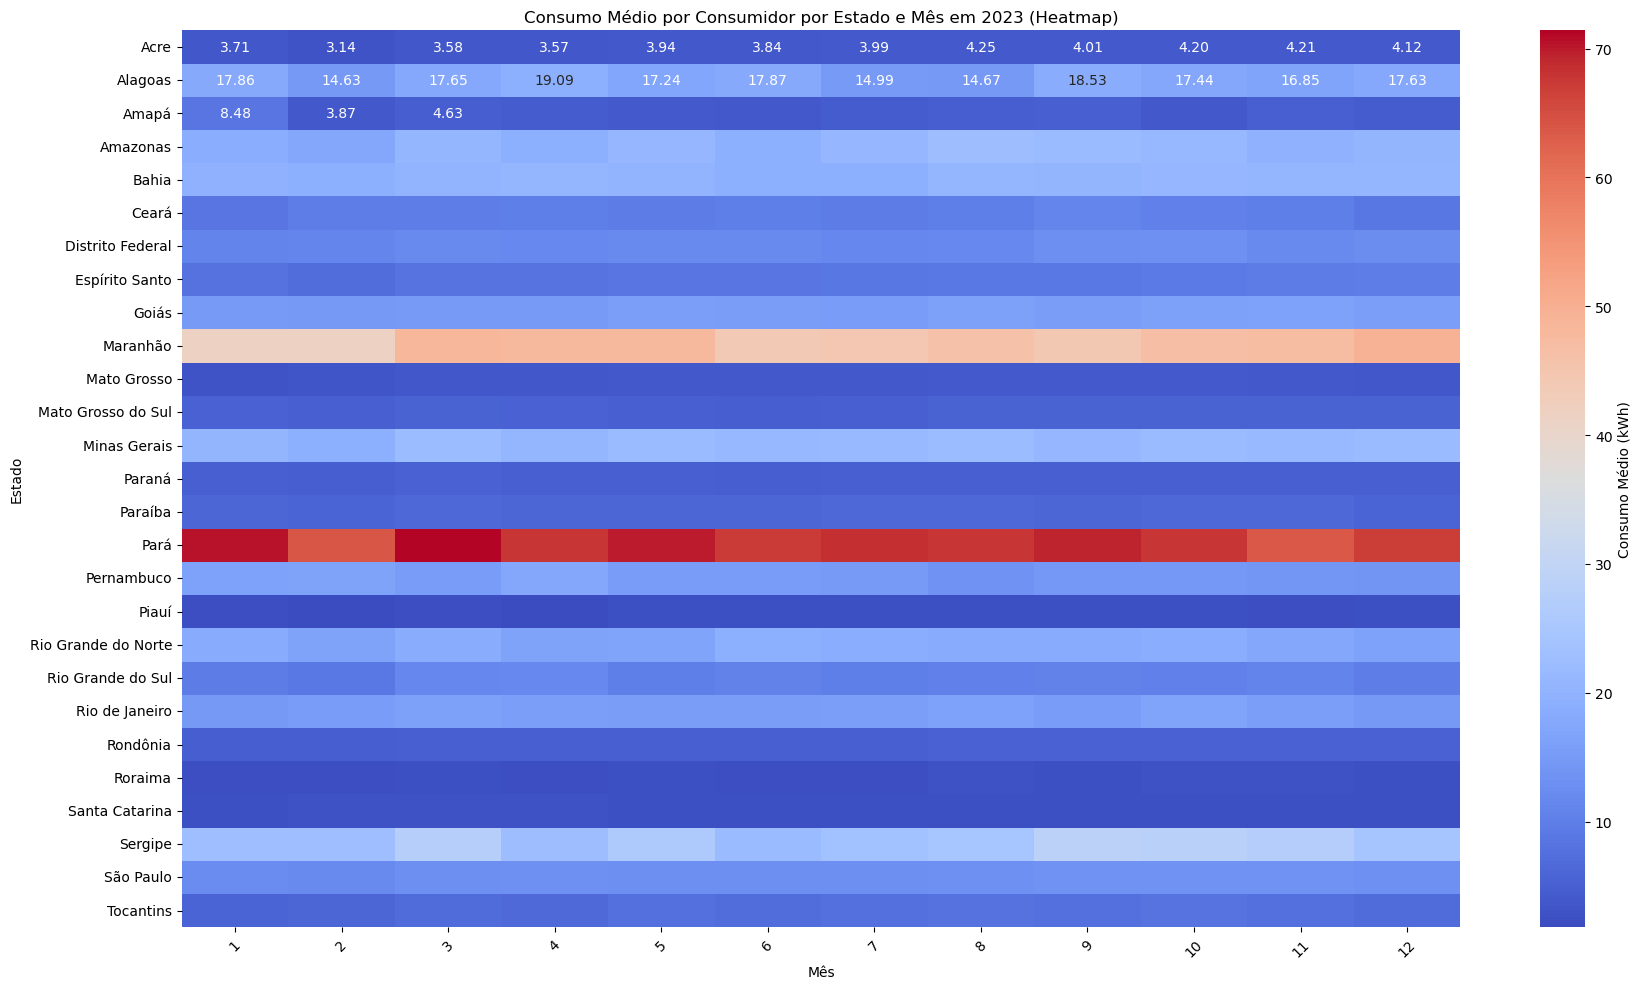

In [40]:
# 17. Consumo médio por consumidor por estado em 2023 (heatmap)
heatmap_estado_mes = df_2023.pivot_table(
    index='estado',
    columns='mes',
    values='consumo_per_capita',
    aggfunc='mean'
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_estado_mes,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Consumo Médio (kWh)'}
)
plt.title('Consumo Médio por Consumidor por Estado e Mês em 2023 (Heatmap)')
plt.ylabel('Estado')
plt.xlabel('Mês')
plt.xticks(ticks=np.arange(len(heatmap_estado_mes.columns)) + 0.5, labels=heatmap_estado_mes.columns, rotation=45)
plt.tight_layout()
plt.show()

Insight: Pará e Maranhão se destacam muito por consumo médio elevado.

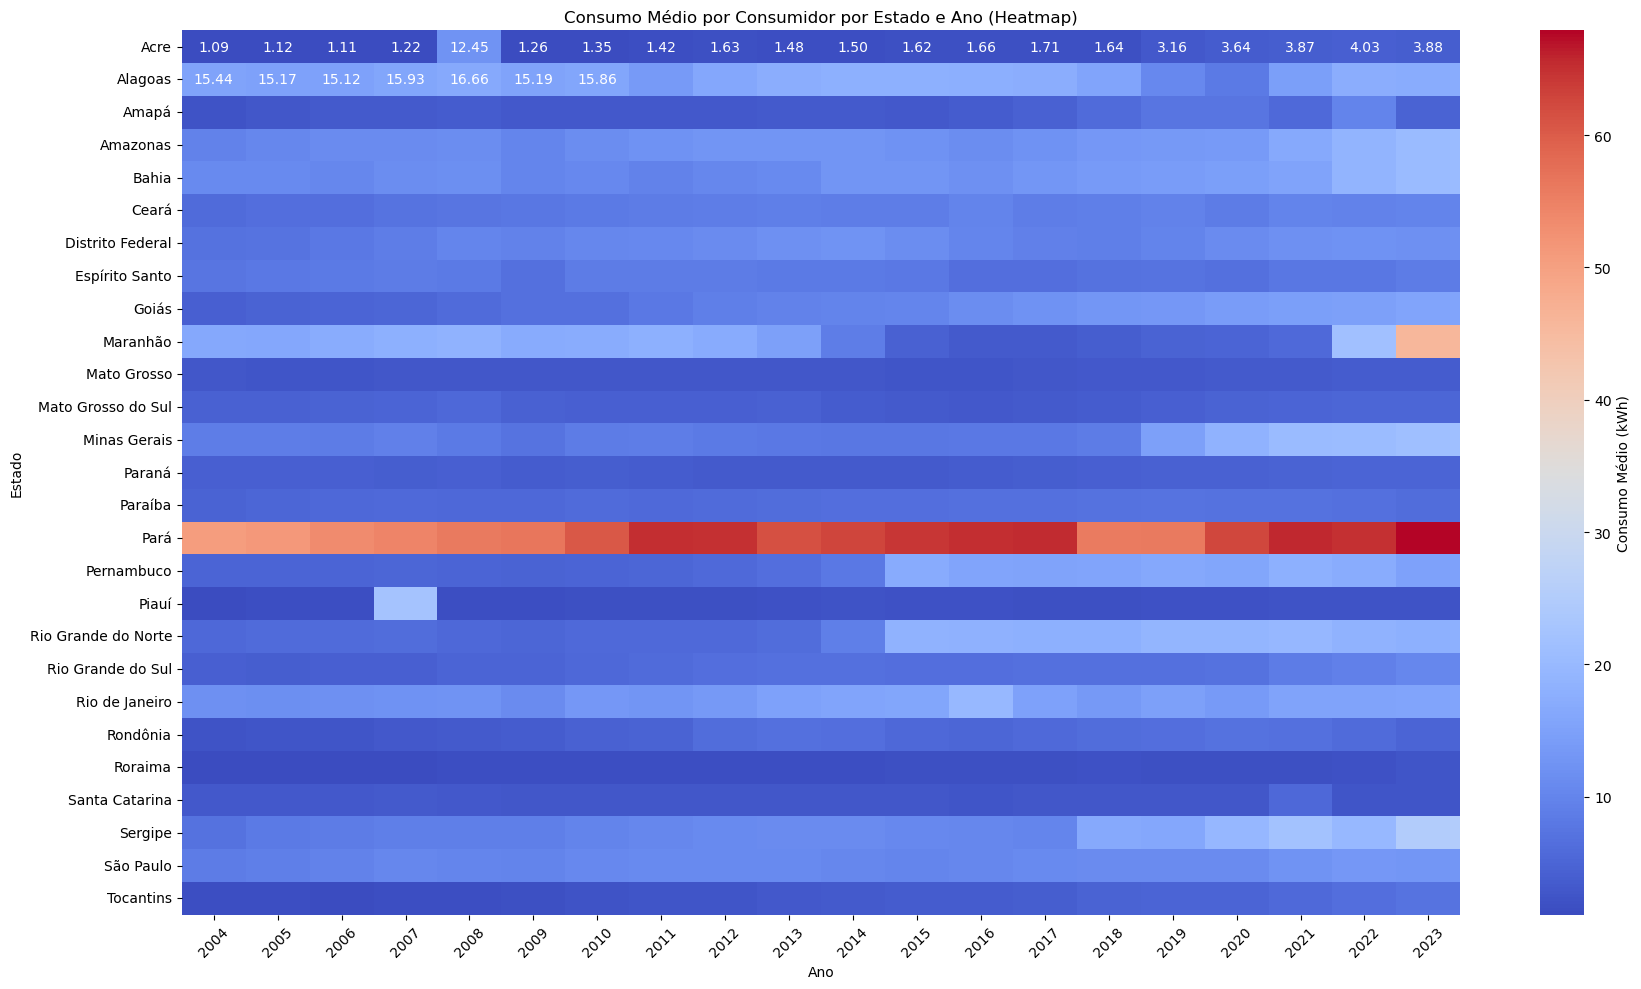

In [42]:
#18.	Consumo médio por consumidor por estado por Ano (heatmap)
heatmap_estado = df_plot.pivot_table(
    index='estado',
    columns='ano',
    values='consumo_per_capita',
    aggfunc='mean'
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_estado,
    cmap='coolwarm',  # azul -> amarelo -> vermelho
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Consumo Médio (kWh)'}
)
plt.title('Consumo Médio por Consumidor por Estado e Ano (Heatmap)')
plt.ylabel('Estado')
plt.xlabel('Ano')
plt.xticks(ticks=np.arange(len(heatmap_estado.columns)) + 0.5, labels=heatmap_estado.columns, rotation=45)
plt.tight_layout()
plt.show()

Insight: O Pico no Maranhã foi entre 2021 e 2022 onde o consumo médio quadriplicou e no ano seguinte mais que dobrou, Pará sempre teve um consumo médio muito acima de todos os outros estados, Santa Catarina diminuiu seu consumo médio nos ultimos 20 anos.

Por Fim Utilizamos o Kmeans para agrupar os estados em grupos de consumo vejamos o resultado abaixo:

In [43]:
# Calcula médias anuais de consumo e consumidores por estado para usar como features
features_cluster = df_completo.groupby(['estado', 'sigla_uf'])[['consumo', 'numero_consumidores']].mean().reset_index()

# Padroniza as features
scaler = StandardScaler()
X = scaler.fit_transform(features_cluster[['consumo', 'numero_consumidores']])

# Aplica o KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
features_cluster['cluster'] = kmeans.fit_predict(X)

import plotly.express as px

# Para o filtro funcionar corretamente, precisamos criar uma lista de visibilidades para cada cluster
# Cada ponto é um estado, então para cada botão, só mostra os pontos do cluster selecionado

# Cria uma coluna de string para o cluster (para facilitar o filtro)
features_cluster['cluster_str'] = features_cluster['cluster'].astype(str)

fig_cluster = px.scatter(
    features_cluster,
    x='consumo',
    y='numero_consumidores',
    color='cluster_str',
    text='sigla_uf',
    title='Clusterização dos Estados Brasileiros por Consumo e Número de Consumidores',
    labels={'consumo': 'Consumo Médio (kWh)', 'numero_consumidores': 'Nº Consumidores Médio', 'cluster_str': 'Cluster'},
    hover_data=['estado', 'sigla_uf', 'cluster']
)

fig_cluster.update_traces(textposition='top center')

# Cria botões para filtrar clusters
buttons = []
for i in sorted(features_cluster['cluster'].unique()):
    visible = [trace.name == str(i) for trace in fig_cluster.data]
    buttons.append(dict(
        label=f'Cluster {i}',
        method='update',
        args=[
            {'visible': visible},
            {'title': f'Clusterização dos Estados - Cluster {i}'}
        ]
    ))
# Botão para mostrar todos
buttons.append(dict(
    label='Todos',
    method='update',
    args=[
        {'visible': [True] * len(fig_cluster.data)},
        {'title': 'Clusterização dos Estados Brasileiros por Consumo e Número de Consumidores'}
    ]
))

fig_cluster.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=1.15,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)
fig_cluster.show()

c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Este gŕafico é interativo e é possível trocar os clusters mas veremos os seguintes agrupamentos:<br>
Cluster 0 [ES, MT, DF, AM, RN, MS, PB, AL, SE, PI, RO, TO, AC, AP, RR] São estados com população e consumo menores<br>
Cluster 1 SP o estado é tão grande tão fora da curva em consumo e população que ele teve um custer só para ele não haviam vizinhos próximos nos quesitos população e consumo<br>
Cluster 2 [BA, RS, PR] São estados com bom consumo e boa População.<br>
Cluster 3 [RJ, MG] Se SP é fora da curva em relação ao restante do Brasil RJ e MG são fora da curva quando removemos SP, eles são muito grandes em termos de população e industrialização então tem um cluster só para eles dois.<br>
Cluster 4 [SC, PA, GO, PE, CE, MA] São estados com dados de consumo mais medianos, nem tão fortes nem tão fracos.<br>
